In [38]:
%pylab inline
from scipy.optimize import curve_fit,fsolve

Populating the interactive namespace from numpy and matplotlib


In [28]:
hr=120*"-"
def func(x,a,b):
    return a*x+b

x=np.linspace(0,10,100)
y=func(x,1,2)
yn=y+0.9*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

popt,hr,pcov

(array([ 0.99967056,  2.00200844]),
 '------------------------------------------------------------------------------------------------------------------------',
 array([[ 0.00109399, -0.00546997],
        [-0.00546997,  0.03665067]]))

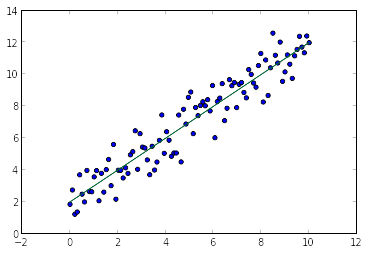

In [29]:
plt.plot(x,y)
plt.scatter(x,yn)
plt.plot(x,func(x,popt[0],popt[1]))

In [24]:
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

popt,hr,pcov

(array([ 0.92788816,  5.02812268, -2.13699698]),
 '------------------------------------------------------------------------------------------------------------------------',
 array([[  2.06448122e-03,  -3.63175962e-06,   3.29381117e-03],
        [ -3.63175962e-06,   1.45361356e-02,  -2.07651020e-05],
        [  3.29381117e-03,  -2.07651020e-05,   1.53251725e-02]]))

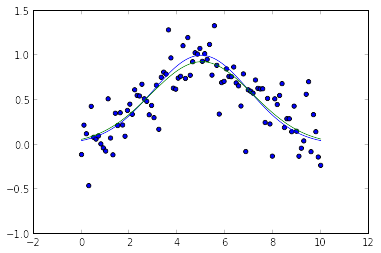

In [26]:
plt.plot(x,y)
plt.scatter(x,yn)
plt.plot(x,func(x,popt[0],popt[1],popt[2]))

In [33]:
def func(x, a0, b0, c0, a1, b1,c1):
    return a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2)) + a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2))
# Generating clean data
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Since we are fitting a more complex function,
# providing guesses for the fitting will lead to
# better results.
guesses = [1, 3, 1, 1, 15, 1]
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn,
p0=guesses)

popt,hr,pcov

(array([  1.00350889,   3.08140999,   1.02988677,  -2.02995326,
         14.98561212,   0.49064763]),
 '------------------------------------------------------------------------------------------------------------------------',
 array([[  3.37695763e-03,   1.08976337e-06,  -2.31282019e-03,
           1.16724126e-20,   6.78095664e-22,   1.88088342e-21],
        [  1.08976337e-06,   4.74119409e-03,  -2.49159398e-06,
           1.09365486e-20,  -1.14686330e-20,   1.76230779e-21],
        [ -2.31282019e-03,  -2.49159398e-06,   4.74800466e-03,
          -2.78059328e-20,  -4.60192913e-22,  -4.48062631e-21],
        [  1.16724126e-20,   1.09365486e-20,  -2.78059328e-20,
           7.08519156e-03,  -5.21327647e-10,   1.14170225e-03],
        [  6.78095664e-22,  -1.14686330e-20,  -4.60192913e-22,
          -5.21327647e-10,   5.51919031e-04,  -1.26270969e-10],
        [  1.88088342e-21,   1.76230779e-21,  -4.48062631e-21,
           1.14170225e-03,  -1.26270969e-10,   5.51919036e-04]]))

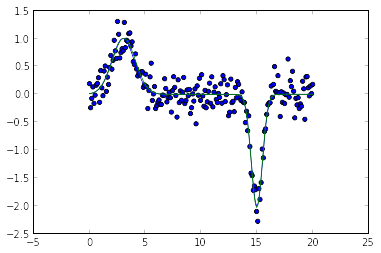

In [37]:
plt.plot(x,y)
plt.scatter(x,yn)
plt.plot(x,func(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))

In [40]:
# Defining function to simplify intersection solution
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)
# Defining functions that will intersect
funky = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5
# Defining range and getting solutions on intersection points
x = np.linspace(0,45,10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])
# Printing out results for x and y
result,hr, line(result)

(array([ 13.40773078,  18.11366128,  31.78330863,  37.0799992 ,
         39.84837786,  43.8258775 ]),
 '------------------------------------------------------------------------------------------------------------------------',
 array([-0.36592269, -0.31886339, -0.18216691, -0.12920001, -0.10151622,
        -0.06174122]))